# Import Libraries

In [141]:
# Import possible libraries needed
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import plotly.graph_objects as go

# ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from sklearn.model_selection import train_test_split 

# Read Data

In [142]:
# Import COVID Data
data = pd.read_csv("/Users/noascharf/Library/CloudStorage/OneDrive-Personal/Documents/Data Science/Fall 2023/DASC 2113/Final Project/Covid Data.csv", sep = ',', on_bad_lines='warn')

# Show first 5 rows
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


# Describing the Data

In [143]:
# Look at info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [144]:
# Describe data
data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [145]:
# View shape
print(data.shape)

(1048575, 21)


In [146]:
# Look into null values
data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

Looking at this, it does not really tell us if there are null values or not, because in the data 97, 98, & 99 are null values. Which I will look into later

# Data Cleaning

In [147]:
# Look into pregnancy variable in both sexes
data.groupby(['SEX', 'PREGNANT'])['PREGNANT'].count()

SEX  PREGNANT
1    1             8131
     2           513179
     98            3754
2    97          523511
Name: PREGNANT, dtype: int64

PREGNANT value equals 97 for every string for male sex. So every man has the value 97 in PREGNANT column because men can't be pregnant. So, replace this value with 0. We see that when doctors don't have any info about women pregnancy they put 98 value to the PREGNANT column

In [148]:
# Replace the male pregnancy values to 0 (this will be matched by the other variables later)
data['PREGNANT'].replace({97 : 0, 98 : np.nan}, inplace = True)

In [149]:
# Check to see that I did it correctly
data.groupby(['SEX', 'PREGNANT'])['PREGNANT'].count()

SEX  PREGNANT
1    1.0           8131
     2.0         513179
2    0.0         523511
Name: PREGNANT, dtype: int64

In [150]:
# Replace the 2's (no's) in the data with 0's for easier readability
data['USMER'].replace(2.0, 0, inplace=True)
data['SEX'].replace(2.0, 0, inplace=True)
data['PATIENT_TYPE'].replace(2.0, 0, inplace=True)
data['INTUBED'].replace(2.0, 0, inplace=True)
data['PNEUMONIA'].replace(2.0, 0, inplace=True)
data['PREGNANT'].replace(2.0, 0, inplace=True)
data['DIABETES'].replace(2.0, 0, inplace=True)
data['COPD'].replace(2.0, 0, inplace=True)
data['ASTHMA'].replace(2.0, 0, inplace=True)
data['INMSUPR'].replace(2.0, 0, inplace=True)
data['HIPERTENSION'].replace(2.0, 0, inplace=True)
data['OTHER_DISEASE'].replace(2.0, 0, inplace=True)
data['CARDIOVASCULAR'].replace(2.0, 0, inplace=True)
data['OBESITY'].replace(2.0, 0, inplace=True)
data['RENAL_CHRONIC'].replace(2.0, 0, inplace=True)
data['TOBACCO'].replace(2.0, 0, inplace=True)
data['ICU'].replace(2.0, 0, inplace=True)

In [152]:
# Check value counts on every variable to see null values (doing this all below)
data.INTUBED.value_counts()

INTUBED
97    848544
0     159050
1      33656
99      7325
Name: count, dtype: int64

In [153]:
data.PATIENT_TYPE.value_counts()

PATIENT_TYPE
1    848544
0    200031
Name: count, dtype: int64

In [154]:
data.PNEUMONIA.value_counts()

PNEUMONIA
0     892534
1     140038
99     16003
Name: count, dtype: int64

In [155]:
data.PREGNANT.value_counts()

PREGNANT
0.0    1036690
1.0       8131
Name: count, dtype: int64

In [156]:
data.DIABETES.value_counts()

DIABETES
0     920248
1     124989
98      3338
Name: count, dtype: int64

In [157]:
data.COPD.value_counts()

COPD
0     1030510
1       15062
98       3003
Name: count, dtype: int64

In [158]:
data.ASTHMA.value_counts()

ASTHMA
0     1014024
1       31572
98       2979
Name: count, dtype: int64

In [159]:
data.INMSUPR.value_counts()

INMSUPR
0     1031001
1       14170
98       3404
Name: count, dtype: int64

In [160]:
data.HIPERTENSION.value_counts()

HIPERTENSION
0     882742
1     162729
98      3104
Name: count, dtype: int64

In [161]:
data.OTHER_DISEASE.value_counts()

OTHER_DISEASE
0     1015490
1       28040
98       5045
Name: count, dtype: int64

In [162]:
data.CARDIOVASCULAR.value_counts()

CARDIOVASCULAR
0     1024730
1       20769
98       3076
Name: count, dtype: int64

In [163]:
data.OBESITY.value_counts()

OBESITY
0     885727
1     159816
98      3032
Name: count, dtype: int64

In [164]:
data.RENAL_CHRONIC.value_counts()

RENAL_CHRONIC
0     1026665
1       18904
98       3006
Name: count, dtype: int64

In [165]:
data.TOBACCO.value_counts()

TOBACCO
0     960979
1      84376
98      3220
Name: count, dtype: int64

In [166]:
data.ICU.value_counts()

ICU
97    848544
0     175685
1      16858
99      7488
Name: count, dtype: int64

Intubed, and ICU have high number of missing values

# Data Prep

In [167]:
# Remove rows with missing/null data, exlcuding intubed and icu due to the missing data
data = data[(data.PNEUMONIA == 1) | (data.PNEUMONIA == 0)]
data = data[(data.DIABETES == 1) | (data.DIABETES == 0)]
data = data[(data.COPD == 1) | (data.COPD == 0)]
data = data[(data.ASTHMA == 1) | (data.ASTHMA == 0)]
data = data[(data.INMSUPR == 1) | (data.INMSUPR == 0)]
data = data[(data.HIPERTENSION == 1) | (data.HIPERTENSION == 0)]
data = data[(data.OTHER_DISEASE == 1) | (data.OTHER_DISEASE == 0)]
data = data[(data.CARDIOVASCULAR == 1) | (data.CARDIOVASCULAR == 0)]
data = data[(data.OBESITY == 1) | (data.OBESITY == 0)]
data = data[(data.RENAL_CHRONIC == 1) | (data.RENAL_CHRONIC == 0)]
data = data[(data.TOBACCO == 1) | (data.TOBACCO == 0)] 
data = data[(data.PREGNANT == 1) | (data.PREGNANT == 0)]

# view dataset
data.shape

(1021977, 21)

I still have over 1,000,000 rows after filtering, so there is still a good amount of data to work with. This is good

In [168]:
# Make a column for patients that died (dead/alive indicator)

# 9999-99-99 = patient is alive (1)
# anything else = patient is dead (0)

data["DIED"] = [1 if each=="9999-99-99" else 0 for each in data.DATE_DIED]

#check to see added column
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,0,1,1,1,03/05/2020,97,1,65,0.0,0,...,0,1,0,0,0,0,0,3,97,0
1,0,1,0,1,03/06/2020,97,1,72,0.0,0,...,0,1,0,0,1,1,0,5,97,0
2,0,1,0,0,09/06/2020,1,0,55,0.0,1,...,0,0,0,0,0,0,0,3,0,0
3,0,1,1,1,12/06/2020,97,0,53,0.0,0,...,0,0,0,0,0,0,0,7,97,0
4,0,1,0,1,21/06/2020,97,0,68,0.0,1,...,0,1,0,0,0,0,0,3,97,0


In [169]:
# Check new column
data.DIED.value_counts()

DIED
1    947320
0     74657
Name: count, dtype: int64

In [170]:
# Remove date died column because we have another one saying if they died or not
del data['DATE_DIED']

# Check to see if column is deletd
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,0,1,1,1,97,1,65,0.0,0,0,...,0,1,0,0,0,0,0,3,97,0
1,0,1,0,1,97,1,72,0.0,0,0,...,0,1,0,0,1,1,0,5,97,0
2,0,1,0,0,1,0,55,0.0,1,0,...,0,0,0,0,0,0,0,3,0,0
3,0,1,1,1,97,0,53,0.0,0,0,...,0,0,0,0,0,0,0,7,97,0
4,0,1,0,1,97,0,68,0.0,1,0,...,0,1,0,0,0,0,0,3,97,0


# Visualization/Correlation

In [171]:
# Look at value counts for sex for visualization
data.SEX.value_counts()

SEX
0    511936
1    510041
Name: count, dtype: int64

In [172]:
# Define labels and values for graph
labels = ['Female','Male']
values = [510041,511936]

# Create figure
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])
fig.show()

The split between males and females is almost 50/50

Text(0.5, 1.0, 'Age Distribution')

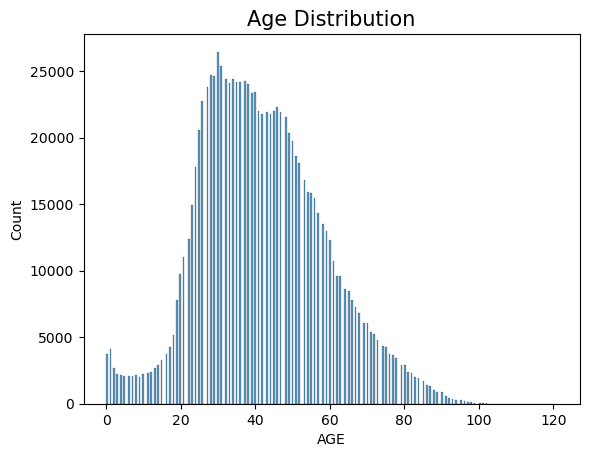

In [173]:
# Make graph for age distribution
sns.histplot(x=data.AGE)
plt.title("Age Distribution", color= 'black', fontsize=15)

The patients in this dataset are mostly between the ages of 20 - 65 ish years old

Text(0.5, 1.0, 'Covid Deaths by Age')

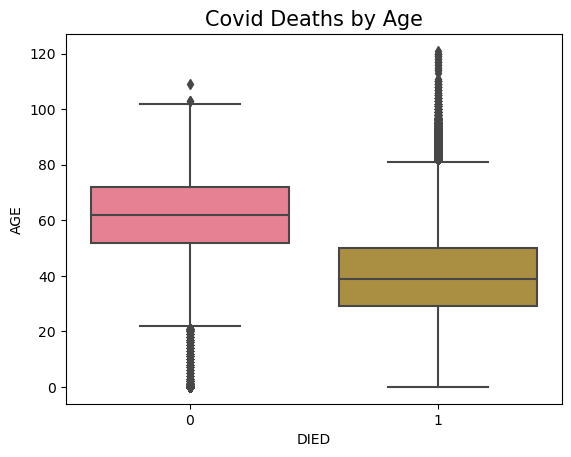

In [174]:
# Create a graph for deaths by age
# Remember that 0 means the patient died, and 1 means that the patient survived

sns.boxplot(x="DIED", y="AGE",data=data,palette=sns.color_palette('husl'))
plt.title("Covid Deaths by Age",fontsize=15, color="black")

From this visualization you can see that the mean age for patients that died (0 - left side) is higher than the mean age for those who survived. The mean age for those who died is a little higher than 60, and for those who survived it's around 40. You must also take into consideration infant deaths for COVID-19, which could likely be a reason for skew.

Text(0.5, 1.0, 'Correlation Between COVID-19 Variables')

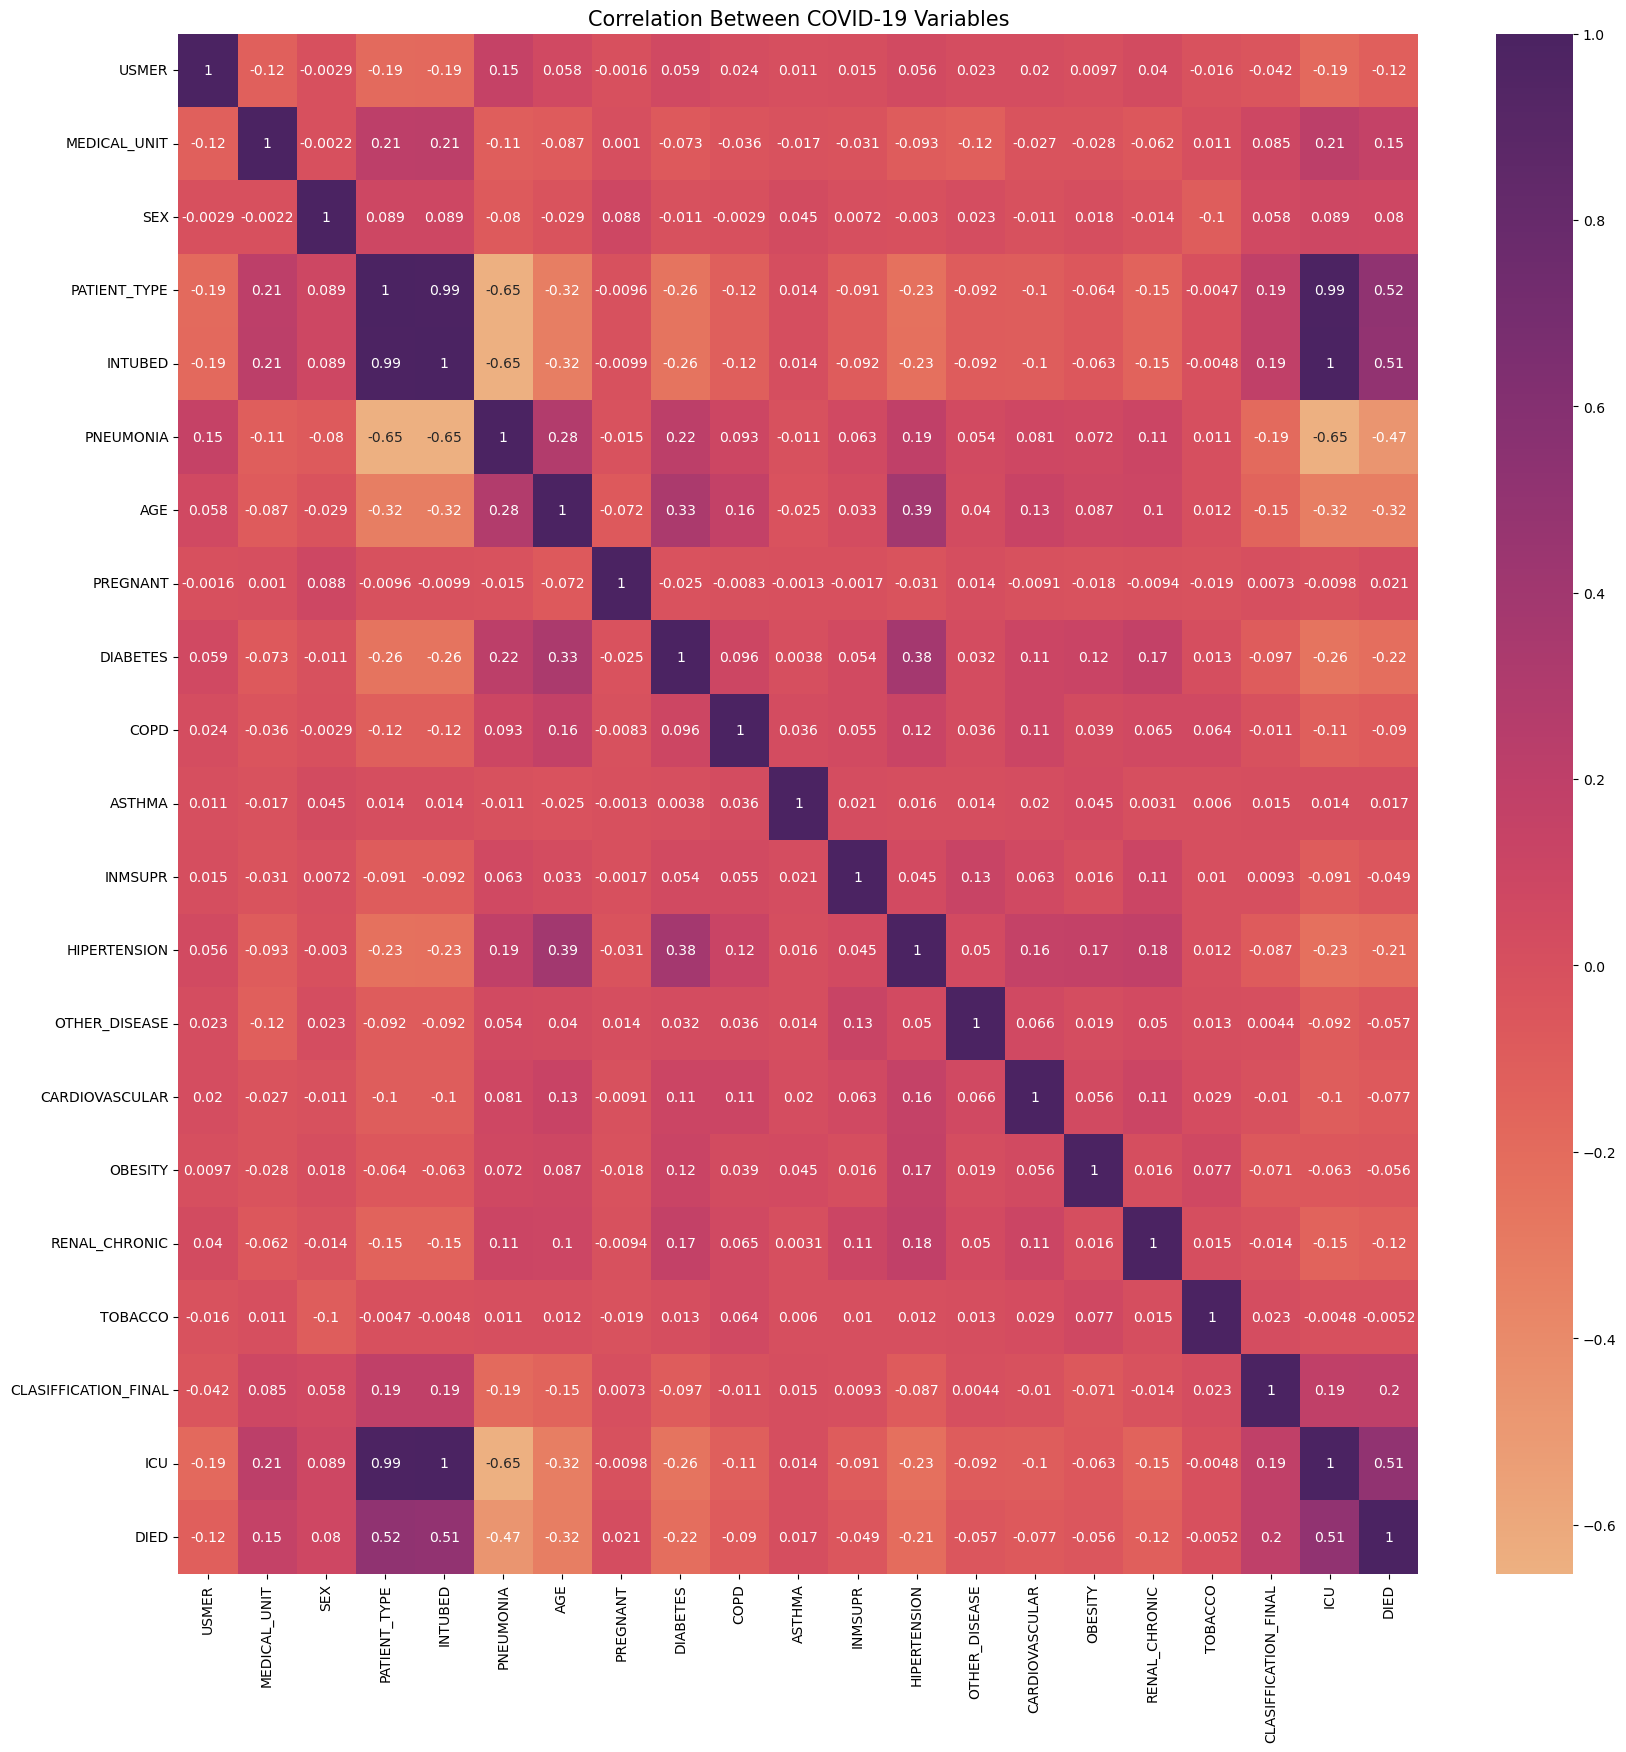

In [176]:
# Make a graph to view correlation 
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap='flare')
plt.title('Correlation Between COVID-19 Variables', fontsize=15, color='black')

From the heatmap, you can see that sex, pregnant, copd, asthma, inmsupr, other diseases, cardiovascular, obesity, and tobacco all have a low correlation to death (under 0.1). The other variables have high correlation

# Machine Learning

In [177]:
# Define x by making a dataframe holding the features
data_x = pd.DataFrame(data, columns = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'])

# Check shape to make sure it includes everything
data_x.shape

(1021977, 18)

In [178]:
# Define y by making a dataframe holding the feature
data_y = pd.DataFrame(data, columns = ['DIED'])

# Check the shape to make sure it is correct
data_y.shape

(1021977, 1)

In [179]:
# Split the data into an 80% train - 20% test set
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size= .2, random_state=0)

# Print shape of training data
print('Training shape: ', train_x.shape, train_y.shape)

# Print the shape of test data
print('Test shape: ', test_x.shape, test_y.shape)

# Reset index of training
train_x.reset_index(inplace = True)
train_y.reset_index(inplace = True)

# Drop index column of training
train_x = train_x.drop("index", axis = 1)
train_y = train_y.drop("index", axis = 1)

# Reset index of test
test_x.reset_index(inplace = True)
test_y.reset_index(inplace = True)

# Drop index column of test
test_x = test_x.drop("index", axis = 1)
test_y = test_y.drop("index", axis = 1)

Training shape:  (817581, 18) (817581, 1)
Test shape:  (204396, 18) (204396, 1)


I decided to do an 80/20 (training/test) split on my data since this is a very common. It is also from the Pareto Principle, so I decided that this would be the split that I choose for my data